In [ ]:
!pip install ultralytics
!pip install roboflow

In [2]:
import os
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from roboflow import Roboflow
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
dataset_path = '/kaggle/input/cccd-word-detection'

In [4]:
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')
valid_path = os.path.join(dataset_path, 'valid')

In [27]:
img_train_folder_path = os.path.join(train_path, 'images')
img_test_folder_path = os.path.join(test_path, 'images')
img_valid_folder_path = os.path.join(valid_path, 'images')

label_train_folder_path = os.path.join(train_path, 'labels')
label_test_folder_path = os.path.join(test_path, 'labels')
label_valid_folder_path = os.path.join(valid_path, 'labels')

In [30]:
img_train_paths = [os.path.join(img_train_folder_path, img_name) for img_name in os.listdir(img_train_folder_path)]
img_test_paths = [os.path.join(img_test_folder_path, img_name) for img_name in os.listdir(img_test_folder_path)]
img_valid_paths = [os.path.join(img_valid_folder_path, img_name) for img_name in os.listdir(img_valid_folder_path)]

label_train_paths = [os.path.join(label_train_folder_path, label_name) for label_name in os.listdir(label_train_folder_path)]
label_test_paths = [os.path.join(label_test_folder_path, label_name) for label_name in os.listdir(label_test_folder_path)]
label_valid_paths = [os.path.join(label_valid_folder_path, label_name) for label_name in os.listdir(label_valid_folder_path)]

In [33]:
def get_id(path):
    return path.split('.')[-2]

In [41]:
plot_img_path = img_test_paths[0]

for label_path in label_test_paths:
    if get_id(plot_img_path) == get_id(label_path):
        plot_label_path = label_path
        print('Done')
        break
else:
    print('None')

Done


In [87]:
class_colors = [(255,0,0), (0,255,0), (0,0,255),
               (255,255,0), (255,0,255), (0,255,255),
               (255,128,0), (255,255,255),(0,0,0)]

In [90]:
def plot_img(img_path, label_path):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    h_img, w_img, _ = img.shape

    with open(label_path, 'r') as label_file:
        lines = label_file.readlines()
        label_file.close()

    labels_mid_point = []
    for line in lines:
        label = tuple(line.strip().split(' '))
        labels_mid_point.append(label)

    labels_2_points = []
    for label in labels_mid_point:
        class_index = label[0]
        true_mid_point = (float(label[1]) * w_img, float(label[2]) * h_img)
        true_w_label = float(label[3]) * w_img
        true_h_label = float(label[4]) * h_img

        pts1 = (int(true_mid_point[0] - true_w_label/2), int(true_mid_point[1] - true_h_label/2))
        pts2 = (int(true_mid_point[0] + true_w_label/2), int(true_mid_point[1] + true_h_label/2))

        labels_2_points.append((class_index, pts1, pts2))

    for label in labels_2_points:
        cv2.rectangle(img, label[1], label[2], color=class_colors[int(label[0])], thickness=5)

    plt.imshow(img)

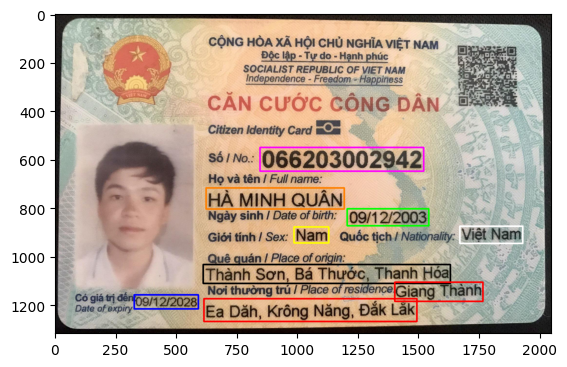

In [91]:
plot_img(plot_img_path, plot_label_path)

In [ ]:
torch.hub.load('ultralytics/yolov5', 'yolov5n', pretrained=True)

In [4]:
model = YOLO('/kaggle/working/yolov5n.pt')

PRO TIP 💡 Replace 'model=/kaggle/working/yolov5n.pt' with new 'model=/kaggle/working/yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.31M/5.31M [00:00<00:00, 64.2MB/s]


In [7]:
result_model = model.train(
    data="/kaggle/input/cccd-dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=64,
    lr0=0.0001,
    dropout=0.15,
    device=0,
    augment=True  # Enable data augmentation
)

Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov5n.pt, data=/kaggle/input/cccd-dataset/data.yaml, epochs=50, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]
2024-10-02 14:02:12,933	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-02 14:02:13,489	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.24.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 62.1MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/cccd-dataset/train/labels... 795 images, 1 backgrounds, 0 corrupt: 100%|██████████| 795/795 [00:02<00:00, 275.80it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/cccd-dataset/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2025, len(boxes) = 6418. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/input/cccd-dataset/valid/labels... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<00:00, 257.86it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cccd-dataset/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 63, len(boxes) = 1323. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 75 weight(decay=0.0), 82 weight(decay=0.0005), 81 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.92G      2.375      4.522      1.737        270        640: 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        161       1323    0.00852     0.0273    0.00566    0.00376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.51G      1.276      3.889      1.076        317        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all        161       1323      0.038      0.556      0.164      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.59G       1.17      3.086     0.9767        392        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all        161       1323     0.0451      0.572      0.319      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.55G      1.179      2.101      0.985        303        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all        161       1323     0.0498       0.53      0.382      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.54G      1.158      1.451     0.9814        329        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all        161       1323     0.0379      0.541      0.457      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.62G      1.122      1.142     0.9728        269        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all        161       1323     0.0498      0.773      0.594        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.55G      1.108     0.9961     0.9717        348        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all        161       1323       0.04      0.831      0.644      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.59G      1.102     0.9292     0.9738        358        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all        161       1323      0.973      0.229      0.822      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.55G      1.085     0.8701     0.9731        363        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all        161       1323      0.969      0.226      0.936      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.59G      1.064     0.8276     0.9658        278        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all        161       1323       0.95      0.595      0.928      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.57G      1.055        0.8     0.9606        343        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all        161       1323      0.952      0.737       0.94      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.55G      1.054     0.7952      0.965        442        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all        161       1323      0.943      0.911      0.948      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.55G      1.031     0.7611     0.9565        405        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all        161       1323      0.941      0.947      0.949      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.55G      1.026     0.7427     0.9542        267        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all        161       1323      0.944      0.944      0.946      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       8.6G       1.03     0.7405     0.9585        289        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all        161       1323      0.954      0.966      0.943      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       8.6G      1.034     0.7211     0.9593        367        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all        161       1323      0.939      0.963      0.946       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       8.6G      1.019     0.7108     0.9569        278        640: 100%|██████████| 13/13 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all        161       1323      0.946      0.962       0.95      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.55G      1.017     0.6993     0.9494        342        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all        161       1323      0.949      0.967       0.95      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.57G      1.025     0.6921     0.9512        279        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all        161       1323      0.945      0.964      0.949      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.57G      1.035     0.6888     0.9573        360        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all        161       1323      0.958      0.965      0.953      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.57G       1.02     0.6815      0.952        293        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all        161       1323      0.957       0.97      0.951      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       8.6G     0.9906     0.6521      0.948        338        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all        161       1323      0.956      0.967      0.954      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.57G      1.017     0.6727     0.9457        329        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all        161       1323      0.942      0.958       0.94      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       8.6G      1.001     0.6456     0.9488        281        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all        161       1323      0.953      0.967      0.953      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.55G     0.9924     0.6493     0.9448        280        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all        161       1323      0.953      0.968      0.949      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.59G     0.9896     0.6502     0.9434        391        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all        161       1323       0.95      0.962      0.946      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.64G     0.9798     0.6275     0.9424        374        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all        161       1323      0.953      0.964      0.949       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.56G     0.9837     0.6186     0.9433        246        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all        161       1323      0.954      0.966       0.95      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.55G     0.9839     0.6189     0.9433        279        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all        161       1323      0.956      0.966      0.953      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.55G     0.9854      0.617      0.943        406        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all        161       1323      0.957      0.966      0.955       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.59G     0.9678     0.6014     0.9356        344        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all        161       1323      0.951      0.963      0.946       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.55G     0.9626      0.592     0.9364        290        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all        161       1323      0.957      0.966      0.957      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.52G     0.9598     0.5842     0.9316        303        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all        161       1323      0.954      0.964      0.953       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.57G     0.9475     0.5809     0.9294        358        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all        161       1323      0.953      0.965      0.954      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.57G     0.9564     0.5992     0.9434        335        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all        161       1323      0.954      0.965      0.955       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.55G     0.9569     0.5819     0.9313        322        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all        161       1323      0.955      0.961      0.953      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.57G     0.9443     0.5776     0.9311        340        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all        161       1323      0.953      0.965      0.956      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.59G     0.9428     0.5731     0.9357        310        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all        161       1323       0.95      0.963      0.953       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.57G     0.9451     0.5791      0.936        248        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all        161       1323      0.952      0.965      0.955       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.62G     0.9363      0.578     0.9314        314        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all        161       1323      0.958      0.966      0.961      0.706


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.55G     0.9343      0.568     0.9293        216        640: 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all        161       1323      0.955      0.967      0.958      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.54G      0.936     0.5554     0.9256        199        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all        161       1323      0.955      0.963       0.95      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.55G     0.9067     0.5413     0.9118        214        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all        161       1323      0.956      0.962       0.95      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.55G     0.9089     0.5341     0.9149        218        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all        161       1323      0.955      0.965      0.956      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.55G      0.901     0.5272     0.9172        229        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all        161       1323      0.956      0.963      0.955      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.55G     0.9002     0.5241     0.9082        212        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all        161       1323      0.958      0.962      0.956      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.55G     0.8894      0.519      0.912        210        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all        161       1323      0.959      0.964       0.96      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.55G     0.8875     0.5153     0.9096        204        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all        161       1323       0.96      0.964      0.958      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.55G     0.8935     0.5186     0.9072        215        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all        161       1323      0.958      0.964      0.959      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.54G     0.8799     0.5116     0.9036        185        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all        161       1323       0.96      0.964      0.961      0.712



50 epochs completed in 0.133 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 4.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 4.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv5n summary (fused): 211 layers, 2,183,419 parameters, 0 gradients, 5.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]


                   all        161       1323       0.96      0.966      0.962      0.705
         current_place        145        287      0.944      0.936      0.938      0.721
                   dob        146        146      0.991          1      0.993      0.697
           expire_date        145        145      0.938      0.952      0.949      0.655
                gender        144        144      0.932      0.938      0.927      0.601
                    id        147        147      0.998          1      0.995      0.798
            issue_date         14         14      0.975          1      0.995      0.776
                  name        147        148      0.991      0.986      0.989      0.793
           nationality        145        145      0.938      0.952      0.958      0.675
          origin_place        143        147      0.932      0.933      0.914      0.633
Speed: 0.2ms preprocess, 6.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect

lr/pg0,▂▃▅▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
lr/pg1,▂▃▄▅▆████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
lr/pg2,▂▃▄▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁
metrics/mAP50(B),▁▂▃▄▄▆▇█████████████████████████████████
metrics/mAP50-95(B),▁▂▃▃▄▅▆▇▇▇█▇█▇▇████▇█▇██████████████████
metrics/precision(B),▁▁▁▁▁▁██████████████████████████████████
metrics/recall(B),▁▅▅▅▅▇▂▂▅▆██████████████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


In [8]:
model.save('new_model.pt')

In [9]:
result = model(cv2.imread('/kaggle/input/cccd-dataset/test/images/1131_jpg.rf.0a9253f40a0a9b51519ab94b9db8fece.jpg'))


0: 640x640 3 current_places, 1 dob, 1 expire_date, 1 gender, 1 id, 1 name, 1 nationality, 3 origin_places, 95.3ms
Speed: 3.3ms preprocess, 95.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


In [31]:
conf = result[0].boxes.conf.cpu().numpy()
box = result[0].boxes.xyxy.cpu().numpy()
class_index = result[0].boxes.cls.cpu().numpy()

In [47]:
result[0].save_crop('predict')

In [46]:
os.mkdir('predict')

In [48]:
import shutil
from IPython.display import FileLink

def make_archive(source, destination):
    base = os.path.basename(destination)
    name = base.split('.')[0]
    format = base.split('.')[1]
    
    archive_from = os.path.dirname(source)
    archive_to = os.path.basename(source.strip(os.sep))
    print(source, destination, archive_from, archive_to)
    
    shutil.make_archive(name, format, archive_from, archive_to)
    shutil.move('%s.%s'%(name,format), destination)
    
make_archive('/kaggle/working/predict', 'predict.zip')
os.chdir('/kaggle/working')
FileLink('predict.zip')

/kaggle/working/predict predict.zip /kaggle/working predict


/kaggle/working/predict.zip